# A chained LLM app
Here we are attempting to generate a blog using LangGraph. The LLM will first be prompted to generate an outline. The LLM will then elaborate upon the outline to give us a finished blog.

### 1. Import dependencies

In [1]:
from langgraph.graph import StateGraph, START, END
from langchain_ollama.chat_models import ChatOllama
from typing import TypedDict

### 2. Linking the model

In [2]:
model = ChatOllama(model="gemma:2b")

### 3. Create a state

In [3]:
class BlogState(TypedDict):                      # The BlogState inherits a TypedDict
    topic: str
    outline: str
    blog: str

### 4. Define the function for the graph node

In [4]:
def llm_outline(state: BlogState) -> BlogState:
    # Extract the question from the state
    topic = state["topic"]


    # Form a prompt
    prompt = f"I require an outline for a blog on {topic}."


    # Ask the question to the model
    outline = model.invoke(prompt).content


    # Update the state with the answer
    state['outline'] = outline

    return state


def llm_blog(state: BlogState) -> BlogState:
    # Extract the outline from the state
    outline = state["outline"]


    # Form a prompt
    prompt = f"Write a detailed blog based on the following outline:\n{outline}"


    # Ask the question to the model
    blog = model.invoke(prompt).content


    # Update the state with the answer
    state["blog"] = blog

    return state

### 5. Create the graph

In [5]:
# Declare the graph:
graph = StateGraph(BlogState)                    # The StateGraph takes the state as a parameter, signifying that the "state" will be exchanged between the nodes through the edges.

# Add a nodes/states to the graph:
graph.add_node("llm_outline", llm_outline)
graph.add_node("llm_blog", llm_blog)


# Add edges to the graph:
graph.add_edge(START, 'llm_outline')
graph.add_edge('llm_outline', 'llm_blog')
graph.add_edge('llm_blog', END)

### 6. Compile the graph

In [6]:
workflow = graph.compile()

### 7. Run the code

In [7]:
initial_state = { "topic" : "Motorcycles" }

final_state = workflow.invoke(initial_state)

print(final_state)


{'topic': 'Motorcycles', 'outline': '**Blog Outline: Motorcycles**\n\n**I. Introduction**\n\n* Definition of motorcycles and their history\n* Benefits and drawbacks of motorcycle ownership\n* Types of motorcycles and their purposes\n\n**II. Motorcycle History and Evolution**\n\n* The Evolution of Motorcycle Design\n* Early Motorcycle Manufacturers and Their Products\n* The Rise of Motorcycle Culture\n\n**III. Motorcycle Technology**\n\n* Engine Systems and Mechanics\n* Suspension and Steering Systems\n* Electrical and Lighting Systems\n* Safety Features and Compliance\n\n**IV. Motorcycle Culture and Lifestyle**\n\n* The Motorcycle Community\n* Motorcycle Shows and Events\n* Street Culture and Customs\n\n**V. Motorcycle Maintenance and Repair**\n\n* Basic Maintenance Tasks\n* Common Motorcycle Problems and Solutions\n* How to Read a Motorcycle Maintenance Manual\n\n**VI. Motorcycle Maintenance and Repair**\n\n* Engine Tune-Ups and Replacements\n* Suspension and Steering Adjustments\n* E

In [8]:
print(final_state["outline"])

**Blog Outline: Motorcycles**

**I. Introduction**

* Definition of motorcycles and their history
* Benefits and drawbacks of motorcycle ownership
* Types of motorcycles and their purposes

**II. Motorcycle History and Evolution**

* The Evolution of Motorcycle Design
* Early Motorcycle Manufacturers and Their Products
* The Rise of Motorcycle Culture

**III. Motorcycle Technology**

* Engine Systems and Mechanics
* Suspension and Steering Systems
* Electrical and Lighting Systems
* Safety Features and Compliance

**IV. Motorcycle Culture and Lifestyle**

* The Motorcycle Community
* Motorcycle Shows and Events
* Street Culture and Customs

**V. Motorcycle Maintenance and Repair**

* Basic Maintenance Tasks
* Common Motorcycle Problems and Solutions
* How to Read a Motorcycle Maintenance Manual

**VI. Motorcycle Maintenance and Repair**

* Engine Tune-Ups and Replacements
* Suspension and Steering Adjustments
* Electrical Wiring and Testing
* Safety Checks and Inspections

**VII. Motor

In [9]:
print(final_state["blog"])

## Motorcycles: A Comprehensive Guide

**Introduction**

Motorcycles, a fascinating blend of engineering and design, have become an integral part of modern society. From the rumbling roar of their engines to the sheer thrill of riding, motorcycles offer a unique and exhilarating experience. This comprehensive guide delves into the world of motorcycles, covering their rich history, technology, culture, maintenance, and safety.

**I. Motorcycle History and Evolution**

The origins of motorcycles can be traced back to ancient civilizations. Early forms of wheeled vehicles, such as carriages and camels, paved the way for the development of motorcycles. The first motorcycle, the "Kershaw," was built in 1886 by the English engineer Henry White. Over the following century, motorcycle design and technology advanced significantly. The invention of the internal combustion engine, particularly in the early 20th century, revolutionized motorcycle performance and paved the way for the modern-day mo

### 8. The Graph

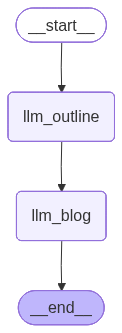

In [10]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())